# ETL Cleaning and Prep data from MySkin

## Import

In [33]:
import pandas as pd
import numpy as np
import os
import json
import re
import time
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
path = "/Users/naruebet.orgl/Workspace/Labs/rnd_ai/myskin_scraping/raws/ALL_PRODUCTS_ULTRA_FAST_20250916_194921.json"

In [3]:
df = pd.read_json(path)

In [7]:
pd.set_option('display.max_columns', None)
df[122:125]

,name,url,price,original_price,description,ingredients,benefits,usage,images,category,subcategory,rating,reviews_count,availability,sku,tags,detailed_info,mechanism,appearance,storage,shelf_life,dosage,recommended_dosage,mix_method,heat_resistance,ph_stability,solubility,product_types,inci_name,coa_specifications,sample_products,usage_percent_lo,usage_percent_hi,usage_percent_best,internal_type,cost,lot,exp_date,product_type,id_product,stock_lot,stock_expdate,minimal_qty,product_reagent
122,3-(4-Isobutylphenyl)propanoic acid,https://www.myskinrecipes.com/shop/th/certifie...,None,NaN,ใช้เป็นสารตั้งต้นในการสังเคราะห์ยาต้านการอักเส...,None,None,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารตั้งต้นในการส...,[https://www.myskinrecipes.com/shop/img/logo-1...,certified reference materials,None,NaN,NaN,In Stock,200318,None,ใช้เป็นสารตั้งต้นในการสังเคราะห์ยาต้านการอักเส...,None,None,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN
123,Potassium hydroxide solution,https://www.myskinrecipes.com/shop/th/analytic...,None,NaN,ใช้เป็นสารดูดซับกรดในกระบวนการบำบัดก๊าซเสีย โด...,None,[ใช้ในอุตสาหกรรมทำความสะอาด เนื่องจากมีฤทธิ์กั...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารดูดซับกรดในกร...,[https://www.myskinrecipes.com/shop/img/logo-1...,analytical chromatography,None,NaN,NaN,In Stock,223875,None,ใช้เป็นสารดูดซับกรดในกระบวนการบำบัดก๊าซเสีย โด...,None,ย โดยเฉพาะก๊าซที่มีความเป็นกรด เช่น ซัลเฟอร์ได...,None,None,NaN,None,NaN,None,ของสารละลาย,ไขมันและน้ำมันได้ดี จึงพบในน้ำยาล้างคราบไขมันห...,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN
124,Citric acid,https://www.myskinrecipes.com/shop/th/acids/15...,None,NaN,ใช้ในอุตสาหกรรมอาหารและเครื่องดื่มเป็นส่วนใหญ่...,None,[ในอุตสาหกรรมทำความสะอาด ใช้เป็นสารช่วยละลายคร...,0.00-0.00% (แนะนำ 0.00%)\nในอุตสาหกรรมอาหารและ...,[https://www.myskinrecipes.com/shop/img/logo-1...,acids,None,NaN,NaN,In Stock,157600,None,ใช้ในอุตสาหกรรมอาหารและเครื่องดื่มเป็นส่วนใหญ่...,None,ยโดยการควบคุมค่าความเป็นกรด-ด่าง (pH) ทำให้จุล...,None,None,NaN,None,NaN,None,) ทำให้จุลินทรีย์เติบโตได้ยาก,คราบหินปูนและคราบแร่ธาตุ เนื่องจากสามารถจับกับ...,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN


## Exploration

### ดูข้อมูลว่ามีกี่ % ที่ไม่ Null

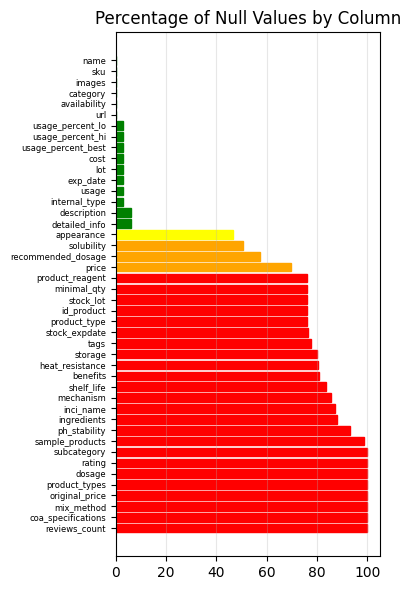

In [37]:
import matplotlib.pyplot as plt

# Calculate null percentages
null_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

# Create horizontal bar chart
plt.figure(figsize=(4, 6))
bars = plt.barh(range(len(null_percent)), null_percent.values)

# Color bars based on percentage
colors = ['red' if x > 75 else 'orange' if x > 50 else 'yellow' if x > 25 else 'green' for x in null_percent.values]
for bar, color in zip(bars, colors):
    bar.set_color(color)  # This line needs to be indented

plt.yticks(range(len(null_percent)), null_percent.index, fontsize=6)  # Smaller fontplt.xlabel('Null Percentage (%)')
plt.title('Percentage of Null Values by Column')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
df.head(3)

,name,url,price,original_price,description,ingredients,benefits,usage,images,category,subcategory,rating,reviews_count,availability,sku,tags,detailed_info,mechanism,appearance,storage,shelf_life,dosage,recommended_dosage,mix_method,heat_resistance,ph_stability,solubility,product_types,inci_name,coa_specifications,sample_products,usage_percent_lo,usage_percent_hi,usage_percent_best,internal_type,cost,lot,exp_date,product_type,id_product,stock_lot,stock_expdate,minimal_qty,product_reagent
0,Propyzamide Solution,https://www.myskinrecipes.com/shop/th/food-amp...,None,NaN,สาร Propyzamide Solution ใช้เป็นสารกำจัดวัชพืช...,None,[มักใช้พ่นก่อนที่วัชพืชจะงอกหรือหลังปลูกพืชไปแ...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารกำจัดวัชพืชใน...,[https://www.myskinrecipes.com/shop/img/logo-1...,food amp cosmetic component standards,None,NaN,NaN,In Stock,224127,None,สาร Propyzamide Solution ใช้เป็นสารกำจัดวัชพืช...,None,่ยงต่อการปนเปื้อนน้ำใต้ดิน และเหมาะสำหรับใช้ใน...,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN
1,Pectin,https://www.myskinrecipes.com/shop/th/spectroq...,None,NaN,เพกตินถูกใช้เป็นสารทำให้เกิดเจลในอุตสาหกรรมอาห...,None,[ในอุตสาหกรรมยา เพกตินใช้เป็นสารยึดติดในเม็ดยา...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารทำให้เกิดเจลใ...,[https://www.myskinrecipes.com/shop/img/logo-1...,spectroquant photometry instruments kits amp a...,None,NaN,NaN,In Stock,223129,None,เพกตินถูกใช้เป็นสารทำให้เกิดเจลในอุตสาหกรรมอาห...,None,ผลไม้ในน้ำผลไม้และเครื่องดื่ม เพื่อป้องกันไม่ใ...,None,None,NaN,เพกตินในการควบคุมการปลดปล่อยยาในร่างกาย เนื่อง...,NaN,None,None,น้ำได้ และช่วยเพิ่มปริมาณอุจจาระ,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN
2,Docusate sodium,https://www.myskinrecipes.com/shop/th/pharmaco...,None,NaN,ใช้เป็นยาระบายอ่อนๆ ที่ช่วยให้อุจจาระนุ่มและเค...,None,None,0.00-0.00% (แนะนำ 0.00%)\nของแพทย์หรือเภสัชกรเ...,[https://www.myskinrecipes.com/shop/img/logo-1...,pharmacopeia amp metrological institutes stand...,None,NaN,NaN,In Stock,121783,None,ใช้เป็นยาระบายอ่อนๆ ที่ช่วยให้อุจจาระนุ่มและเค...,None,None,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN


### แสดงข้อมูลที่ไม่ Null เลย

ไม่มีข้อมูลที่ไม่ null เลย แสดงว่าชุดข้อมูลแต่ละ page มีความต่างกันทำให้บาง column ไม่มีในบาง page

In [42]:
rows_no_null = df[df.notna().all(axis=1)]
print(f"Rows with complete data (no nulls): {len(rows_no_null)}")
print(f"Total rows: {len(df)}")
print(f"Percentage of complete rows: {len(rows_no_null)/len(df)*100:.2f}%")

# Show first 5 complete rows
rows_no_null.head()

Rows with complete data (no nulls): 0
Total rows: 20813
Percentage of complete rows: 0.00%


,name,url,price,original_price,description,ingredients,benefits,usage,images,category,subcategory,rating,reviews_count,availability,sku,tags,detailed_info,mechanism,appearance,storage,shelf_life,dosage,recommended_dosage,mix_method,heat_resistance,ph_stability,solubility,product_types,inci_name,coa_specifications,sample_products,usage_percent_lo,usage_percent_hi,usage_percent_best,internal_type,cost,lot,exp_date,product_type,id_product,stock_lot,stock_expdate,minimal_qty,product_reagent


In [43]:
df.head()

,name,url,price,original_price,description,ingredients,benefits,usage,images,category,subcategory,rating,reviews_count,availability,sku,tags,detailed_info,mechanism,appearance,storage,shelf_life,dosage,recommended_dosage,mix_method,heat_resistance,ph_stability,solubility,product_types,inci_name,coa_specifications,sample_products,usage_percent_lo,usage_percent_hi,usage_percent_best,internal_type,cost,lot,exp_date,product_type,id_product,stock_lot,stock_expdate,minimal_qty,product_reagent
0,Propyzamide Solution,https://www.myskinrecipes.com/shop/th/food-amp...,None,NaN,สาร Propyzamide Solution ใช้เป็นสารกำจัดวัชพืช...,None,[มักใช้พ่นก่อนที่วัชพืชจะงอกหรือหลังปลูกพืชไปแ...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารกำจัดวัชพืชใน...,[https://www.myskinrecipes.com/shop/img/logo-1...,food amp cosmetic component standards,None,NaN,NaN,In Stock,224127,None,สาร Propyzamide Solution ใช้เป็นสารกำจัดวัชพืช...,None,่ยงต่อการปนเปื้อนน้ำใต้ดิน และเหมาะสำหรับใช้ใน...,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN
1,Pectin,https://www.myskinrecipes.com/shop/th/spectroq...,None,NaN,เพกตินถูกใช้เป็นสารทำให้เกิดเจลในอุตสาหกรรมอาห...,None,[ในอุตสาหกรรมยา เพกตินใช้เป็นสารยึดติดในเม็ดยา...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารทำให้เกิดเจลใ...,[https://www.myskinrecipes.com/shop/img/logo-1...,spectroquant photometry instruments kits amp a...,None,NaN,NaN,In Stock,223129,None,เพกตินถูกใช้เป็นสารทำให้เกิดเจลในอุตสาหกรรมอาห...,None,ผลไม้ในน้ำผลไม้และเครื่องดื่ม เพื่อป้องกันไม่ใ...,None,None,NaN,เพกตินในการควบคุมการปลดปล่อยยาในร่างกาย เนื่อง...,NaN,None,None,น้ำได้ และช่วยเพิ่มปริมาณอุจจาระ,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN
2,Docusate sodium,https://www.myskinrecipes.com/shop/th/pharmaco...,None,NaN,ใช้เป็นยาระบายอ่อนๆ ที่ช่วยให้อุจจาระนุ่มและเค...,None,None,0.00-0.00% (แนะนำ 0.00%)\nของแพทย์หรือเภสัชกรเ...,[https://www.myskinrecipes.com/shop/img/logo-1...,pharmacopeia amp metrological institutes stand...,None,NaN,NaN,In Stock,121783,None,ใช้เป็นยาระบายอ่อนๆ ที่ช่วยให้อุจจาระนุ่มและเค...,None,None,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN
3,Fumonisin B2,https://www.myskinrecipes.com/shop/th/food-amp...,None,NaN,ฟูมอนิซิน เบ2 เป็นไมโครท็อกซินที่เกิดจากเชื้อร...,None,None,0.00-0.00% (แนะนำ 0.00%),[https://www.myskinrecipes.com/shop/img/logo-1...,food amp cosmetic component standards,None,NaN,NaN,In Stock,141977,None,ฟูมอนิซิน เบ2 เป็นไมโครท็อกซินที่เกิดจากเชื้อร...,None,่ยงต่อสุขภาพ,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN
4,PRIMIDONE,https://www.myskinrecipes.com/shop/th/analytic...,None,NaN,ไพรมิโดนถูกใช้เป็นยารักษาโรคลมชักและอาการชัก โ...,None,None,0.00-0.00% (แนะนำ 0.00%)\nเป็นยารักษาโรคลมชักแ...,[https://www.myskinrecipes.com/shop/img/logo-1...,analytical chromatography,None,NaN,NaN,In Stock,54717,None,ไพรมิโดนถูกใช้เป็นยารักษาโรคลมชักและอาการชัก โ...,None,None,None,None,NaN,ไพรมิโดนต้องอยู่ภายใต้การดูแลของแพทย์เนื่องจาก...,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN


In [56]:
for idx in range(32, 50):
    print(f"Row {idx}: {df.url[idx]}")

Row 32: https://www.myskinrecipes.com/shop/th/certified-reference-materials/104071--retinol-palmitate.html
Row 33: https://www.myskinrecipes.com/shop/th/1445-vitamin-b-for-dietary-supplement?order=product.price.asc
Row 34: https://www.myskinrecipes.com/shop/th/herb-water-soluble-liquid/10291-star-anise-flavor-water-soluble.html
Row 35: https://www.myskinrecipes.com/shop/th/น้ำหอมกลิ่นขนม-กลิ่นอาหาร/2979-cake-batter-ice-cream.html
Row 36: https://www.myskinrecipes.com/shop/th/1700-acids?page=12&order=product.name.asc
Row 37: https://www.myskinrecipes.com/shop/th/immune-support/8769-garlic-extract-สารสกัดกระเทียม-allicin-2-deodorized.html
Row 38: https://www.myskinrecipes.com/shop/th/ไม้ปักกระจายกลิ่น/35246-diffusefix™-fixative-for-diffuser.html
Row 39: https://www.myskinrecipes.com/shop/th/analytical-chromatography/127771-acetaldehyde-standard-solution.html
Row 40: https://www.myskinrecipes.com/shop/th/ส่วนประกอบน้ำหอม-aldehyde-ไขมัน/2439-4-decenal-fema-3264.html
Row 41: https://www.mys

In [49]:
df.detailed_info[2]

'ใช้เป็นยาระบายอ่อนๆ ที่ช่วยให้อุจจาระนุ่มและเคลื่อนผ่านลำไส้ได้ง่ายขึ้น มักใช้ในกรณีที่ผู้ป่วยมีอาการท้องผูกหรือต้องหลีกเลี่ยงการเบ่งขณะถ่ายอุจจาระ เช่น หลังการผ่าตัดหรือผู้ที่มีปัญหาเกี่ยวกับทวารหนัก นอกจากนี้ยังใช้เพื่อเตรียมลำไส้ก่อนการตรวจทางแพทย์บางประเภท เช่น การส่องกล้องตรวจลำไส้ใหญ่ ควรใช้ตามคำแนะนำของแพทย์หรือเภสัชกรเพื่อป้องกันผลข้างเคียงที่อาจเกิดขึ้น'

In [65]:
for i, (idx, row) in enumerate(df[df.benefits.notna()].head().iterrows()):
    print(f"\n{i+1}. Product: {row['name']}")
    print(f"   Benefits: {row['benefits']}")


1. Product: Propyzamide Solution
   Benefits: ['มักใช้พ่นก่อนที่วัชพืชจะงอกหรือหลังปลูกพืชไปแล้วเล็กน้อย โดยจะออกฤทธิ์ที่รากและลำต้นอ่อนของวัชพืช ทำให้การแบ่งเซลล์ผิดปกติและหยุดการเจริญเติบโต', 'เนื่องจากเป็นสารที่ออกฤทธิ์เฉพาะจุดและมีการเคลื่อนที่ในดินต่ำ จึงช่วยลดความเสี่ยงต่อการปนเปื้อนน้ำใต้ดิน และเหมาะสำหรับใช้ในระบบการเกษตรที่ต้องการควบคุมวัชพืชอย่างมีประสิทธิภาพโดยไม่ทำลายพืชหลัก']

2. Product: Pectin
   Benefits: ['ในอุตสาหกรรมยา เพกตินใช้เป็นสารยึดติดในเม็ดยาหรือเป็นสารเคลือบเม็ดยา นอกจากนี้ยังมีการศึกษาเกี่ยวกับการใช้เพกตินในการควบคุมการปลดปล่อยยาในร่างกาย เนื่องจากสามารถบวมน้ำและสร้างชั้นเจลได้', 'เพกตินยังถูกนำมาใช้ในผลิตภัณฑ์ดูแลสุขภาพ เช่น อาหารเสริมที่ช่วยในการขับถ่ายหรือลดระดับคอเลสเตอรอล เนื่องจากมีคุณสมบัติเป็นไฟเบอร์ที่ละลายน้ำได้ และช่วยเพิ่มปริมาณอุจจาระ']

3. Product: Titanium dioxide
   Benefits: ['นอกจากนี้ยังใช้ในอุตสาหกรรมอาหารและเครื่องดื่มเป็นสีผสมอาหาร (สีขาว) เพื่อเพิ่มความสดใสให้กับผลิตภัณฑ์ เช่น ลูกกวาด น้ำสลัด และนมเทียม']

4. Product: Nude Pink Glitte

In [66]:
benefits_not_null = df.benefits.notna().sum()
total_rows = len(df)
benefits_null = df.benefits.isna().sum()
percent_not_null = (benefits_not_null / total_rows) * 100
percent_null = (benefits_null / total_rows) * 100

print(f"Benefits not null: {benefits_not_null:,} ({percent_not_null:.2f}%)")
print(f"Benefits null: {benefits_null:,} ({percent_null:.2f}%)")
print(f"Total rows: {total_rows:,}")

Benefits not null: 3,974 (19.09%)
Benefits null: 16,839 (80.91%)
Total rows: 20,813


In [67]:
df[df.benefits.notna()].head()

,name,url,price,original_price,description,ingredients,benefits,usage,images,category,subcategory,rating,reviews_count,availability,sku,tags,detailed_info,mechanism,appearance,storage,shelf_life,dosage,recommended_dosage,mix_method,heat_resistance,ph_stability,solubility,product_types,inci_name,coa_specifications,sample_products,usage_percent_lo,usage_percent_hi,usage_percent_best,internal_type,cost,lot,exp_date,product_type,id_product,stock_lot,stock_expdate,minimal_qty,product_reagent,url_category,url_product
0,Propyzamide Solution,https://www.myskinrecipes.com/shop/th/food-amp...,None,NaN,สาร Propyzamide Solution ใช้เป็นสารกำจัดวัชพืช...,None,[มักใช้พ่นก่อนที่วัชพืชจะงอกหรือหลังปลูกพืชไปแ...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารกำจัดวัชพืชใน...,[https://www.myskinrecipes.com/shop/img/logo-1...,food amp cosmetic component standards,None,NaN,NaN,In Stock,224127,None,สาร Propyzamide Solution ใช้เป็นสารกำจัดวัชพืช...,None,่ยงต่อการปนเปื้อนน้ำใต้ดิน และเหมาะสำหรับใช้ใน...,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.10,,,None,NaN,None,None,NaN,NaN,food-amp-cosmetic-component-standards,224127-propyzamide-solution
1,Pectin,https://www.myskinrecipes.com/shop/th/spectroq...,None,NaN,เพกตินถูกใช้เป็นสารทำให้เกิดเจลในอุตสาหกรรมอาห...,None,[ในอุตสาหกรรมยา เพกตินใช้เป็นสารยึดติดในเม็ดยา...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารทำให้เกิดเจลใ...,[https://www.myskinrecipes.com/shop/img/logo-1...,spectroquant photometry instruments kits amp a...,None,NaN,NaN,In Stock,223129,None,เพกตินถูกใช้เป็นสารทำให้เกิดเจลในอุตสาหกรรมอาห...,None,ผลไม้ในน้ำผลไม้และเครื่องดื่ม เพื่อป้องกันไม่ใ...,None,None,NaN,เพกตินในการควบคุมการปลดปล่อยยาในร่างกาย เนื่อง...,NaN,None,None,น้ำได้ และช่วยเพิ่มปริมาณอุจจาระ,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.10,,,None,NaN,None,None,NaN,NaN,spectroquant-photometry-instruments-kits-amp-a...,223129-pectin
9,Titanium dioxide,https://www.myskinrecipes.com/shop/th/metals/2...,None,NaN,ไทเทเนียมไดออกไซด์ถูกใช้อย่างแพร่หลายในอุตสาหก...,None,[นอกจากนี้ยังใช้ในอุตสาหกรรมอาหารและเครื่องดื่...,0.00-0.00% (แนะนำ 0.00%)\nอย่างแพร่หลายในอุตสา...,[https://www.myskinrecipes.com/shop/img/logo-1...,metals,None,NaN,NaN,In Stock,241166,None,ไทเทเนียมไดออกไซด์ถูกใช้อย่างแพร่หลายในอุตสาหก...,None,โดยช่วยเพิ่มความทึบแสงและความคงทนของสี ทั้งในส...,None,None,NaN,None,NaN,None,None,กระจายตัวในน้ำ,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.10,,,None,NaN,None,None,NaN,NaN,metals,241166-titanium-dioxide
12,"Nude Pink Glitter Mica (Food Grade, 50-500micron)",https://www.myskinrecipes.com/shop/th/pearlesc...,"฿2,227.50ราคาพิเศษนี้สำหรับสั่งหน้าเวปเท่านั้น...",NaN,เกรด อาหาร สามารถรับประทานได้﻿ ใช้ตกแต่งอาหาร\...,None,[Mica สำหรับแต่งสีอาหารเกรด อาหาร สามารถรับประ...,0.10-5.00% (แนะนำ 0.00%)\nแต่งสีอาหารเกรด อาหา...,[https://www.myskinrecipes.com/shop/img/logo-1...,pearlescent powder for food decoration,None,NaN,NaN,In Stock,33344,None,เกรด อาหาร สามารถรับประทานได้﻿ ใช้ตกแต่งอาหาร,None,อาหารเกรด อาหาร สามารถรับประทานได้USA: US FDA ...,None,None,NaN,None,NaN,None,None,กระจายตัวในน้ำ,NaN,None,NaN,None,0.1,5.0,0.0,food,2.95,,,food,33344.0,LRWCRT,2027-04-05,1.0,0.0,pearlescent-powder-for-food-decoration,33344-nude-pink-glitter-mica-food-grade-50-500...
20,Barium sulfate,https://www.myskinrecipes.com/shop/th/salts/14...,None,NaN,ใช้ในอุตสาหกรรมการแพทย์เป็นสารตัวกลางในการถ่าย...,None,[นอกจากนี้ยังใช้ในอุตสาหกรรมกระดาษและผงชูรสเพื...,0.00-0.00% (แนะนำ 0.00%)\nในอุตสาหกรรมการแพทย์...,[https://www.myskinrecipes.com/shop/img/logo-1...,salts,None,NaN,NaN,In Stock,143258,None,ใช้ในอุตสาหกรรมการแพทย์เป็นสารตัวกลางในการถ่าย...,None,เช่น การตรวจระบบทางเดินอาหาร โดยผู้ป่วยจะดื่มห...,None,None,NaN,งานเฉพาะทาง,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.10,,,None,NaN,None,None,NaN,NaN,salts,143258-barium-sulfate


### ทำความเข้าใจ Category Structure

In [68]:
print("Category Column Analysis:")
print(f"Total rows: {len(df)}")
print(f"Non-null categories: {df.category.notna().sum()}")
print(f"Unique categories: {df.category.nunique()}")
print(f"Null categories: {df.category.isna().sum()}")

print("\n" + "="*50 + "\n")

Category Column Analysis:
Total rows: 20813
Non-null categories: 20813
Unique categories: 1248
Null categories: 0




In [70]:
print("Top 10 Most Common Categories:")
print(df.category.value_counts().head(20))

Top 10 Most Common Categories:
category
analytical chromatography                                  3730
certified reference materials                              2033
pharmacopeia amp metrological institutes standards         1202
salts                                                      1174
phytochemical standards                                     947
pesticide standards                                         766
food amp cosmetic component standards                       726
pharma standards                                            638
chromatography amp spectroscopy reagents                    452
acids                                                       429
amino acids                                                 323
carbohydrates                                               323
indicators                                                  214
metals                                                      178
ungrouped aroma chemicals for flavor and fragrances         170


In [71]:
print("Sample of Category Values:")
for cat in df.category.unique()[:10]:
    print(f"- {cat}")

print("\n" + "="*50 + "\n")

Sample of Category Values:
- food amp cosmetic component standards
- spectroquant photometry instruments kits amp accessories
- pharmacopeia amp metrological institutes standards
- analytical chromatography
- silicone oil ระเหยได้
- carbohydrates
- pesticide standards
- metals
- enzyme from microbial fermentation
- non volatile base silicone elastomer 




## Pre Process

### ลบ Column ที่ไม่มีข้อมูล

In [39]:
# Drop Column 100% Null
columns_100_null = null_percent[null_percent == 100].index.tolist()
print(f"Columns with 100% null values: {columns_100_null}")

Columns with 100% null values: ['reviews_count', 'coa_specifications', 'mix_method', 'original_price', 'product_types', 'dosage', 'rating']


In [57]:
df_cleaned = df.drop(columns=columns_100_null)
print(f"\nOriginal shape: {df.shape}")
print(f"New shape after dropping 100% null columns: {df_cleaned.shape}")
print(f"Dropped {len(columns_100_null)} columns")


Original shape: (20813, 44)
New shape after dropping 100% null columns: (20813, 37)
Dropped 7 columns


### เพิ่ม Tags แต่ละข้อมูลด้วย Regex, url

In [58]:
def extract_url_info(df):
      """Extract category and product from URL"""

      # Split URL by '/' and extract relevant parts
      url_parts = df['url'].str.split('/', expand=True)

      # Category is in position 5 (after https://www.myskinrecipes.com/shop/th/)
      df['url_category'] = url_parts[5]

      # Product is in position 6 (the last part)
      df['url_product'] = url_parts[6]

      # Clean up product - remove .html and query parameters
      df['url_product'] = df['url_product'].str.replace('.html', '', regex=False)
      df['url_product'] = df['url_product'].str.split('?').str[0]

      return df

In [59]:
df = extract_url_info(df)

In [60]:
df.head()

,name,url,price,original_price,description,ingredients,benefits,usage,images,category,subcategory,rating,reviews_count,availability,sku,tags,detailed_info,mechanism,appearance,storage,shelf_life,dosage,recommended_dosage,mix_method,heat_resistance,ph_stability,solubility,product_types,inci_name,coa_specifications,sample_products,usage_percent_lo,usage_percent_hi,usage_percent_best,internal_type,cost,lot,exp_date,product_type,id_product,stock_lot,stock_expdate,minimal_qty,product_reagent,url_category,url_product
0,Propyzamide Solution,https://www.myskinrecipes.com/shop/th/food-amp...,None,NaN,สาร Propyzamide Solution ใช้เป็นสารกำจัดวัชพืช...,None,[มักใช้พ่นก่อนที่วัชพืชจะงอกหรือหลังปลูกพืชไปแ...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารกำจัดวัชพืชใน...,[https://www.myskinrecipes.com/shop/img/logo-1...,food amp cosmetic component standards,None,NaN,NaN,In Stock,224127,None,สาร Propyzamide Solution ใช้เป็นสารกำจัดวัชพืช...,None,่ยงต่อการปนเปื้อนน้ำใต้ดิน และเหมาะสำหรับใช้ใน...,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN,food-amp-cosmetic-component-standards,224127-propyzamide-solution
1,Pectin,https://www.myskinrecipes.com/shop/th/spectroq...,None,NaN,เพกตินถูกใช้เป็นสารทำให้เกิดเจลในอุตสาหกรรมอาห...,None,[ในอุตสาหกรรมยา เพกตินใช้เป็นสารยึดติดในเม็ดยา...,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารทำให้เกิดเจลใ...,[https://www.myskinrecipes.com/shop/img/logo-1...,spectroquant photometry instruments kits amp a...,None,NaN,NaN,In Stock,223129,None,เพกตินถูกใช้เป็นสารทำให้เกิดเจลในอุตสาหกรรมอาห...,None,ผลไม้ในน้ำผลไม้และเครื่องดื่ม เพื่อป้องกันไม่ใ...,None,None,NaN,เพกตินในการควบคุมการปลดปล่อยยาในร่างกาย เนื่อง...,NaN,None,None,น้ำได้ และช่วยเพิ่มปริมาณอุจจาระ,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN,spectroquant-photometry-instruments-kits-amp-a...,223129-pectin
2,Docusate sodium,https://www.myskinrecipes.com/shop/th/pharmaco...,None,NaN,ใช้เป็นยาระบายอ่อนๆ ที่ช่วยให้อุจจาระนุ่มและเค...,None,None,0.00-0.00% (แนะนำ 0.00%)\nของแพทย์หรือเภสัชกรเ...,[https://www.myskinrecipes.com/shop/img/logo-1...,pharmacopeia amp metrological institutes stand...,None,NaN,NaN,In Stock,121783,None,ใช้เป็นยาระบายอ่อนๆ ที่ช่วยให้อุจจาระนุ่มและเค...,None,None,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN,pharmacopeia-amp-metrological-institutes-stand...,121783--docusate-sodium
3,Fumonisin B2,https://www.myskinrecipes.com/shop/th/food-amp...,None,NaN,ฟูมอนิซิน เบ2 เป็นไมโครท็อกซินที่เกิดจากเชื้อร...,None,None,0.00-0.00% (แนะนำ 0.00%),[https://www.myskinrecipes.com/shop/img/logo-1...,food amp cosmetic component standards,None,NaN,NaN,In Stock,141977,None,ฟูมอนิซิน เบ2 เป็นไมโครท็อกซินที่เกิดจากเชื้อร...,None,่ยงต่อสุขภาพ,None,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN,food-amp-cosmetic-component-standards,141977-fumonisin-b2
4,PRIMIDONE,https://www.myskinrecipes.com/shop/th/analytic...,None,NaN,ไพรมิโดนถูกใช้เป็นยารักษาโรคลมชักและอาการชัก โ...,None,None,0.00-0.00% (แนะนำ 0.00%)\nเป็นยารักษาโรคลมชักแ...,[https://www.myskinrecipes.com/shop/img/logo-1...,analytical chromatography,None,NaN,NaN,In Stock,54717,None,ไพรมิโดนถูกใช้เป็นยารักษาโรคลมชักและอาการชัก โ...,None,None,None,None,NaN,ไพรมิโดนต้องอยู่ภายใต้การดูแลของแพทย์เนื่องจาก...,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN,analytical-chromatography,54717--primidone


In [61]:
df[['name', 'url_category', 'url_product']].iloc[32:50]

,name,url_category,url_product
32,Retinol palmitate,certified-reference-materials,104071--retinol-palmitate
33,Vitamin B6 วิตามินบี 6 (Pyridoxine Hydrochloride),1445-vitamin-b-for-dietary-supplement?order=pr...,None
34,Star Anise Flavor (Water-Soluble),herb-water-soluble-liquid,10291-star-anise-flavor-water-soluble
35,Cake Batter Ice Cream,น้ำหอมกลิ่นขนม-กลิ่นอาหาร,2979-cake-batter-ice-cream
36,ตะกร้า,1700-acids?page=12&order=product.name.asc,None
37,"Garlic Extract สารสกัดกระเทียม (Allicin 2%, De...",immune-support,8769-garlic-extract-สารสกัดกระเทียม-allicin-2-...
38,DiffuseFix™ (Fixative for Diffuser),ไม้ปักกระจายกลิ่น,35246-diffusefix™-fixative-for-diffuser
39,Acetaldehyde standard solution,analytical-chromatography,127771-acetaldehyde-standard-solution
40,4-decenal (FEMA-3264),ส่วนประกอบน้ำหอม-aldehyde-ไขมัน,2439-4-decenal-fema-3264
41,6-(4-(1-Cyclohexyl-1H-tetrazol-5-yl)butoxy)qui...,certified-reference-materials,157061-6-4-1-cyclohexyl-1h-tetrazol-5-ylbutoxy...


In [82]:
#Show rows which url contains "https://www.myskinrecipes.com/shop/th/1460-immune-antioxidant-support-amino-acids-for-dietary-supplement" inside the url  (regex) can be not exact match
pattern = r"myskinrecipes\.com/shop/th/1460-immune-antioxidant-support-amino-acids-for-dietary-supplement"

filtered = df[df["url"].str.contains(pattern, regex=True, case=False, na=False)]

filtered

,name,url,price,original_price,description,ingredients,benefits,usage,images,category,subcategory,rating,reviews_count,availability,sku,tags,detailed_info,mechanism,appearance,storage,shelf_life,dosage,recommended_dosage,mix_method,heat_resistance,ph_stability,solubility,product_types,inci_name,coa_specifications,sample_products,usage_percent_lo,usage_percent_hi,usage_percent_best,internal_type,cost,lot,exp_date,product_type,id_product,stock_lot,stock_expdate,minimal_qty,product_reagent,url_category,url_product
232,"L-Glutathione Oxidized (Glutathione Disulfide,...",https://www.myskinrecipes.com/shop/th/1460-imm...,฿104.88,NaN,"L-Glutathione Oxidized (Glutathione Disulfide,...",None,None,None,[https://www.myskinrecipes.com/shop/img/logo-1...,1460 immune antioxidant support amino acids fo...,None,NaN,NaN,In Stock,1460,None,"L-Glutathione Oxidized (Glutathione Disulfide,...",ของระบบภูมิคุ้มกันที่แข็งแรง และจำเป็นสำหรับกร...,None,None,None,NaN,None,NaN,None,None,เร็ว เหมาะสำหรับใช้ในผลิตภัณฑ์ชงดื่ม,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,None,None,NaN,NaN,1460-immune-antioxidant-support-amino-acids-fo...,None
1356,"L-Glutathione Oxidized (Glutathione Disulfide,...",https://www.myskinrecipes.com/shop/th/1460-imm...,฿104.88,NaN,"L-Glutathione Oxidized (Glutathione Disulfide,...",None,None,None,[https://www.myskinrecipes.com/shop/img/logo-1...,1460 immune antioxidant support amino acids fo...,None,NaN,NaN,In Stock,1460,None,"L-Glutathione Oxidized (Glutathione Disulfide,...",ของระบบภูมิคุ้มกันที่แข็งแรง และจำเป็นสำหรับกร...,None,None,None,NaN,None,NaN,None,None,เร็ว เหมาะสำหรับใช้ในผลิตภัณฑ์ชงดื่ม,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,None,None,NaN,NaN,1460-immune-antioxidant-support-amino-acids-fo...,None
7877,Glutathione (L-Glutathione Reduced),https://www.myskinrecipes.com/shop/th/1460-imm...,฿35.00,NaN,Glutathione (L-Glutathione Reduced)กลูตาไธโอนม...,None,None,None,[https://www.myskinrecipes.com/shop/img/logo-1...,1460 immune antioxidant support amino acids fo...,None,NaN,NaN,In Stock,1460,None,Glutathione (L-Glutathione Reduced)กลูตาไธโอนม...,ของระบบภูมิคุ้มกันที่แข็งแรง และจำเป็นสำหรับกร...,None,None,None,NaN,None,NaN,None,None,"ในน้ำ, ละลายใน Alcohol, ละลายใน DMSO (Dimethyl...",NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,None,None,NaN,NaN,1460-immune-antioxidant-support-amino-acids-fo...,None
12148,"L-Glutathione Oxidized (Glutathione Disulfide,...",https://www.myskinrecipes.com/shop/th/1460-imm...,฿104.88,NaN,"L-Glutathione Oxidized (Glutathione Disulfide,...",None,None,None,[https://www.myskinrecipes.com/shop/img/logo-1...,1460 immune antioxidant support amino acids fo...,None,NaN,NaN,In Stock,1460,None,"L-Glutathione Oxidized (Glutathione Disulfide,...",ของระบบภูมิคุ้มกันที่แข็งแรง และจำเป็นสำหรับกร...,None,None,None,NaN,None,NaN,None,None,เร็ว เหมาะสำหรับใช้ในผลิตภัณฑ์ชงดื่ม,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,None,None,NaN,NaN,1460-immune-antioxidant-support-amino-acids-fo...,None
13296,Glutathione (L-Glutathione Reduced),https://www.myskinrecipes.com/shop/th/1460-imm...,฿35.00,NaN,Glutathione (L-Glutathione Reduced)กลูตาไธโอนม...,None,None,None,[https://www.myskinrecipes.com/shop/img/logo-1...,1460 immune antioxidant support amino acids fo...,None,NaN,NaN,In Stock,1460,None,Glutathione (L-Glutathione Reduced)กลูตาไธโอนม...,ของระบบภูมิคุ้มกันที่แข็งแรง และจำเป็นสำหรับกร...,None,None,None,NaN,None,NaN,None,None,"ในน้ำ, ละลายใน Alcohol, ละลายใน DMSO (Dimethyl...",NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,None,None,NaN,NaN,1460-immune-antioxidant-support-amino-acids-fo...,None
17657,"L-Glutathione Oxidized (Glutathione Disulfide,...",https://www.myskinrecipes.com/shop/th/1460-imm...,฿104.88,NaN,"L-Glutathione Oxidized (Glutathione Disulfide,...",None,None,None,[https://www.myskinrecipes.com/shop/img/logo-1...,1460 immune antioxidant support amino acids fo...,None,NaN,NaN,In Stock,1460,None,"L-Glutathione Oxidized (Glutathione Disulfid

In [83]:
unique_categories = df['url_category'].nunique()
print(f"Unique url_category values: {unique_categories}")

# Show more details
print(f"\nTotal rows: {len(df):,}")
print(f"Non-null url_category: {df['url_category'].notna().sum():,}")
print(f"Null url_category: {df['url_category'].isna().sum():,}")

# Show distribution
print(f"\nTop 20 url_category values:")
print(df['url_category'].value_counts().head(20))

# Show categories with only 1 product
single_product_categories = (df['url_category'].value_counts() == 1).sum()
print(f"\nCategories with only 1 product: {single_product_categories}")
print(f"Categories with >100 products: {(df['url_category'].value_counts() > 100).sum()}")

Unique url_category values: 1249

Total rows: 20,813
Non-null url_category: 20,813
Null url_category: 0

Top 20 url_category values:
url_category
analytical-chromatography                                  3730
certified-reference-materials                              2033
pharmacopeia-amp-metrological-institutes-standards         1202
salts                                                      1174
phytochemical-standards                                     947
pesticide-standards                                         766
food-amp-cosmetic-component-standards                       726
pharma-standards                                            638
chromatography-amp-spectroscopy-reagents                    452
acids                                                       429
amino-acids                                                 323
carbohydrates                                               323
indicators                                                  214
metals                

In [87]:
df[df['name'].str.contains('Hydroxypropyl|Starch|Phosphate', case=False, na=False, regex=True)]

,name,url,price,original_price,description,ingredients,benefits,usage,images,category,subcategory,rating,reviews_count,availability,sku,tags,detailed_info,mechanism,appearance,storage,shelf_life,dosage,recommended_dosage,mix_method,heat_resistance,ph_stability,solubility,product_types,inci_name,coa_specifications,sample_products,usage_percent_lo,usage_percent_hi,usage_percent_best,internal_type,cost,lot,exp_date,product_type,id_product,stock_lot,stock_expdate,minimal_qty,product_reagent,url_category,url_product
84,Riboflavin-5-Phosphate Sodium (R5P),https://www.myskinrecipes.com/shop/th/1445-vit...,"฿3,127.50",NaN,Riboflavin-5-Phosphate Sodium (R5P)รู้จักกันใน...,None,None,None,[https://www.myskinrecipes.com/shop/img/logo-1...,1445 vitamin b for dietary supplement?page=2,None,NaN,NaN,In Stock,1445,None,Riboflavin-5-Phosphate Sodium (R5P)รู้จักกันใน...,None,None,None,None,NaN,None,NaN,None,None,ในไขมันสูงกว่ารูปแบบไทอามีนทั่วไป ทำให้สามารถผ...,NaN,None,NaN,None,NaN,NaN,NaN,None,NaN,None,None,None,NaN,None,None,NaN,NaN,1445-vitamin-b-for-dietary-supplement?page=2,None
107,Trehalose 6-phosphate dipotassium salt,https://www.myskinrecipes.com/shop/th/carbohyd...,None,NaN,ใช้ในงานวิจัยทางชีววิทยาโดยเฉพาะในการศึกษาเส้น...,None,None,0.00-0.00% (แนะนำ 0.00%)\nในงานวิจัยทางชีววิทย...,[https://www.myskinrecipes.com/shop/img/logo-1...,carbohydrates,None,NaN,NaN,In Stock,129286,None,ใช้ในงานวิจัยทางชีววิทยาโดยเฉพาะในการศึกษาเส้น...,ของเซลล์ตับอ่อนและเซลล์กล้ามเนื้อ,None,None,None,NaN,None,NaN,ความแห้ง หรือการเปลี่ยนแปลงของออสโมซิส โดยเฉพา...,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN,carbohydrates,129286-trehalose-6-phosphate-dipotassium-salt
160,Waxy Corn Starch (Hydroxypropyl distarch phosp...,https://www.myskinrecipes.com/shop/th/carbohyd...,฿75.90ราคาพิเศษนี้สำหรับสั่งหน้าเวปเท่านั้นราค...,NaN,Waxy Corn Starch (Hydroxypropyl distarch phosp...,None,None,0.00-0.00% (แนะนำ 0.00%),[https://www.myskinrecipes.com/shop/img/logo-1...,carbohydrates for food additive,None,NaN,NaN,In Stock,10896,None,Waxy Corn Starch (Hydroxypropyl distarch phosp...,None,None,None,None,NaN,None,NaN,None,None,ละลายในน้ำ,NaN,None,NaN,None,0.0,0.0,0.0,cosmetic,0.1,,,cosmetics,10896.0,K2CPO5,2027-05-24,1.0,0.0,carbohydrates-for-food-additive,10896-waxy-corn-starch-hydroxypropyl-distarch-...
168,Sodium pyrophosphate solution,https://www.myskinrecipes.com/shop/th/salts/23...,None,NaN,ใช้โซเดียมไพโรฟอสเฟตในอุตสาหกรรมอาหารเป็นตัวช่...,None,[ในอุตสาหกรรมสิ่งทอและกระดาษ ใช้โซเดียมไพโรฟอส...,0.00-0.00% (แนะนำ 0.00%)\nโซเดียมไพโรฟอสเฟตในอ...,[https://www.myskinrecipes.com/shop/img/logo-1...,salts,None,NaN,NaN,In Stock,232703,None,ใช้โซเดียมไพโรฟอสเฟตในอุตสาหกรรมอาหารเป็นตัวช่...,None,ยังพบการใช้ในผลิตภัณฑ์ทำความสะอาด ทั้งในน้ำยาล...,น้ำได้ดีและคงความนุ่ม นอกจากนี้ยังใช้เป็นตัวค...,None,NaN,ในผลิตภัณฑ์ทำความสะอาด ทั้งในน้ำยาล้างจานและน้...,NaN,None,) และช่วยป้องกันการเกิดคราบในผลิตภัณฑ์เครื่องดื่ม,ในน้ำยาล้างจานและน้ำยาซักผ้า เนื่องจากมีความสา...,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN,salts,232703-sodium-pyrophosphate-solution
288,Riboflavin 5'-monophosphate sodium salt hydrate,https://www.myskinrecipes.com/shop/th/pharmaco...,None,NaN,ใช้เป็นสารอาหารเสริมในผลิตภัณฑ์อาหารและเครื่อง...,None,None,0.00-0.00% (แนะนำ 0.00%)\nเป็นสารอาหารเสริมในผ...,[https://www.myskinrecipes.com/shop/img/logo-1...,pharmacopeia amp metrological institutes stand...,None,NaN,NaN,In Stock,97052,None,ใช้เป็นสารอาหารเสริมในผลิตภัณฑ์อาหารและเครื่อง...,ของระบบประสาท นอกจากนี้ยังใช้ในอุตสาหกรรมเภสัช...,None,None,None,NaN,วิตามินบี2 ซึ่งช่วยในการเผาผลาญพลังงานและการทำ...,NaN,None,None,None,NaN,None,NaN,None,0.0,0.0,0.0,reagent,0.1,,,None,NaN,None,None,NaN,NaN,pharmacopeia-amp-metrological-institutes-stand...,97052--riboflavin-5-monophosphate-sodium-salt-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,